# TAREFA 3

# Breast Cancer Wisconsin (Diagnostic) Dataset - UCI Machine Learning Repository



Este dataset contém 569 instâncias e 30 atributos numéricos que descrevem características extraídas de imagens digitalizadas de exames de tumores mamários. Esses atributos incluem:

- Radius: Média do raio (distância do centro aos pontos do perímetro)
- Texture: Desvio padrão dos valores de cinza da superfície celular
- Perimeter: Perímetro médio
- Area: Área média
- Smoothness: Variação local nos comprimentos dos raios
- Compactness: (Perímetro² / Área - 1.0)
- Concavity: Severidade das concavidades na superfície celular
- Concave points: Número de pontos côncavos no contorno
Symmetry: Simetria da célula
- Fractal dimension: Dimensão fractal ("aproximação" da irregularidade)

##  O objetivo será agrupar as instâncias com base nas características celulares para encontrar padrões entre diferentes tipos de tumores.

Link para o dataset: Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=aed92c06392b3d4b2a7c99c308cc846b22ae1936aa944078b031304ec4ca5777
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [210]:
#Carregandos bibliotecas importantes para a atividade
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

# Define o tamanho padrão para todas as figuras
plt.rcParams["figure.figsize"] = (10, 8)

import plotly.express as px

import io, os

import missingno as missno

from scipy import stats
import statsmodels.api as sm

from ydata_profiling import ProfileReport

#Fit the model for outlier detection (default)
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from google.colab import drive

In [4]:
#Montando o drive para carregar o arquivo
GOOGLE_COLAB = "google.colab" in str(get_ipython())

if GOOGLE_COLAB:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Metodologia

## Aplicar o algoritmo de K-Means para identificar padrões e similaridades entre tumores mamários a partir das características celulares fornecidas no dataset. O objetivo será agrupar os dados e explorar se os clusters resultantes correspondem a padrões de benignidade ou malignidade dos tumores.



# 1. Coleta e preparação de dados:
## 1.1) Carregar e explorar o dataset para compreender as variáveis e o formato dos dados.
## 1.2)Realizar o pré-processamento necessário, como normalização e tratamento de valores ausentes.

# 1.1) Carregar e explorar o dataset para compreender as variáveis e o formato dos dados.

In [211]:
# Definir os nomes das colunas
column_names = ['id', 'diagnosis',
                'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
                'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
                'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
                'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
                'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [212]:
df = pd.read_csv('/content/drive/MyDrive/2024-2/4 - AM_na_saude/breast/wdbc.data', header=None, names=column_names)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [142]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [143]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


## Já é possível verificar que não existem dados faltantes ou nulos no dataset

In [144]:
df.shape[0]

569

In [145]:
print(f'Número de instâncias (cardinalidade): {df.shape[0]}')
print(f'Número de colunas (atributos): {df.shape[1]}')
df.describe().T

Número de instâncias (cardinalidade): 569
Número de colunas (atributos): 32


,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [20]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Análise dos Dados

 ## Pré-processamento de Dados: A coluna "diagnóstico" tem dois valores: Maligno e Benigno. Por isso, será subsituído:
   
*   Maligno pelo número 1
*   Benigno pelo número 0



In [213]:
df['diagnosis'] = df['diagnosis'].map(lambda f: 1 if f == 'M' else 0)

In [214]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


# Análise dos Dados

## Verificação de valores únicos

In [215]:
print('Quantidade de valores únicos por coluna (atributo):')
df.nunique()

Quantidade de valores únicos por coluna (atributo):


,0
id,569
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave_points_mean,542


## Verfificação do perfil dos atributos e dados

In [ ]:
#Geração do relatório a partir dos dados
profile = ProfileReport(df, title='Relatório de Perfil - Filtro de dados Breast Cancer', explorative=True)

#Exibição do relatório no Colab
profile.to_notebook_iframe()

#Salvar em HTML
profile.to_file('relatorio_df.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Buffered data was truncated after reaching the output size limit.

# Gráfico de Barras para Distruibuição de dados entre Malignos e benignos

In [216]:
# Agrupa e conta valores de 'id' por 'diagnosis'
df_counts = df.groupby('diagnosis')['id'].count().reset_index()

# Renomeia a coluna para melhor entendimento (opcional)
df_counts.columns = ['diagnosis', 'count']

Text(0.5, 1.0, 'Distribuição dos dados entre Maligno e Benigno')

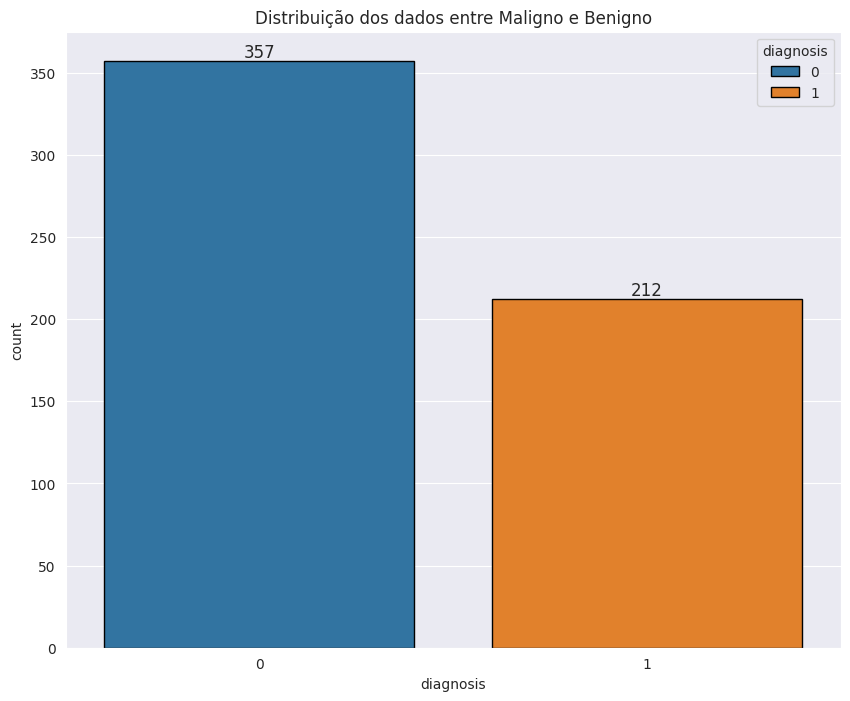

In [217]:
# Cria o gráfico de barras
# plt.figure(figsize=(10,8))
ax = sns.barplot(
    data=df_counts,
    x='diagnosis',
    y='count',
    hue='diagnosis',
    edgecolor='black'
)
sns.set_style("darkgrid")
# Adiciona rótulos às barras
ax.bar_label(ax.containers[0], fontsize=12)
ax.bar_label(ax.containers[1], fontsize=12)

# Define o título
ax.set_title('Distribuição dos dados entre Maligno e Benigno')
# plt.show()

## Matriz de Correlação Diagonal: Para estes dados, será utilizada a implementação da matriz de correlação do sklearn, que utiliza o Coeficiente de Correlação de Pearson como padrão.

In [218]:
df_corr = df.drop(columns=['id', 'diagnosis'], axis=1)

In [219]:
corr_matrix = df_corr.corr()


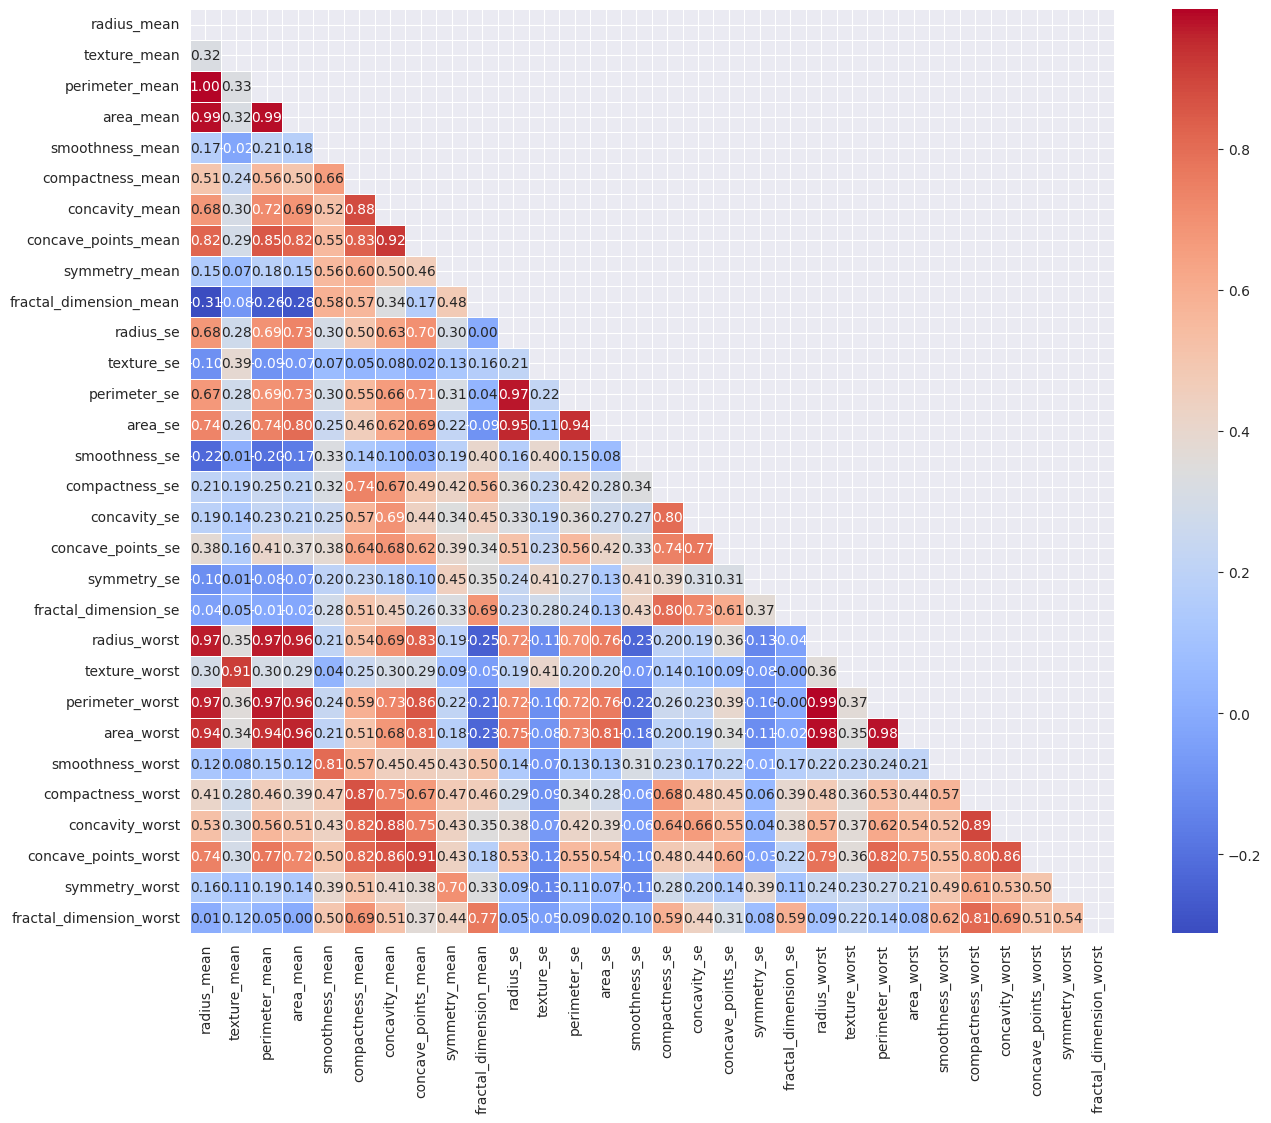

In [220]:
plt.figure(figsize=(15, 12))
# corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,
            annot=True,
            mask=mask,
            linewidth=.5,
            fmt="0.2f",
            cmap='coolwarm',
            square=True)
plt.show()

## Observações:

## Raio, Área e Perímetro estão correlacionados (corr>0,9), pois a área e o perímetro são calculados usando os valores do raio.

## Texture_mean e texture_worst estão altamente correlacionados com corr_value = 0,91 (texture_worst é o maior valor de todas as texturas).

## Compactness_mean, concavity_mean, concave_points_mean também estão altamente correlacionados com valores na faixa de 0,7 a 0,9.

## Symmetry_mean e symmetry_worst também estão correlacionados por valores de 0,7.

## Fractal_dimension_mean e fractal_dimension_worst estão correlacionados pelo valor 0,77.

#Observações mais profundas:

## Pairplots: Gráficos que permitem ver tanto a distribuição de variáveis individuais quanto a relação entre um par de variáveis do conjunto dado de variáveis/características na forma de uma matriz.

In [221]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [222]:
df_pairplot = df.drop(columns=['id'], axis=1)

In [223]:
# Filtra itens que contêm a substring "_mean"
cols_mean = [item for item in df.columns if "_mean" in item]

In [224]:
cols_mean = ['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [225]:
df_cols_mean = pd.DataFrame(df, columns=cols_mean)

In [226]:
plt.figure(figsize=(12,10))
sns.pairplot(
    df_cols_mean,
    hue='diagnosis',
    diag_kind="kde",
    palette = ["blue","darkorange"]
)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Observações:

## Uma das principais conclusões a partir desses gráficos é observar que há um certo nível de separação entre os tipos de dados malignos e benignos. Essa separação pode ser de extrema utilidade para usar essas características na concepção de um algoritmo de aprendizado de máquina. Principalmente algoritmos que levam em consideração clusters e distâncias entre pontos de dados. Além disso é muito mais fácil visualizar as correlações positivas e negativas pela perspectiva limitada que é humana no que concerne a visualização.

#Box Plots and Violin Plots:

* Box Plot: Um box plot fornece informações sobre a variabilidade e dispersão dos dados na forma de uma caixa. A linha do meio representa o valor mediano e os primeiros e terceiros quartis nas extremidades. O Mínimo e o Máximo são representados por linhas de cada lado da caixa.
* Gráficos de Violino: Os Gráficos de Violino têm a vantagem de combinar esses dados com seus gráficos de densidade, permitindo-nos ver a totalidade da distribuição dos dados em um único gráfico

## Ambos também ajudam na interpretação dos resultados de um determinado algoritmo.



In [227]:
# Filtra itens que contêm a substring "_radius"
cols_radius = [item for item in df.columns if "radius" in item or item == "diagnosis"]
df_cols_radius = pd.DataFrame(df, columns=cols_radius)

# Filtra itens que contêm a substring "paerimeter"
cols_perimeter = [item for item in df.columns if "perimeter" in item or item == "diagnosis"]
df_cols_perimeter = pd.DataFrame(df, columns=cols_perimeter)

# Filtra itens que contêm a substring "area"
cols_area = [item for item in df.columns if "area" in item or item == "diagnosis"]
df_cols_area = pd.DataFrame(df, columns=cols_area)


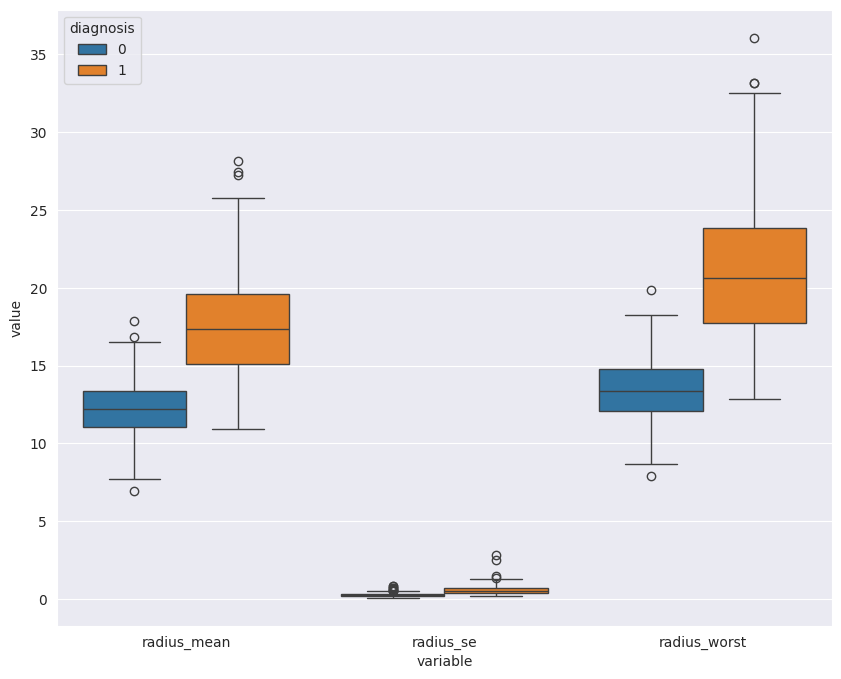

In [228]:
plt.figure(figsize=(10,8))
sns.boxplot(x= "variable" ,y = "value", hue= "diagnosis",
            data=pd.melt(df_cols_radius,
                         id_vars='diagnosis'))
plt.show()

<ipython-input-229-fa0b3f96acba>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x= "variable" ,y = "value", hue= "diagnosis",


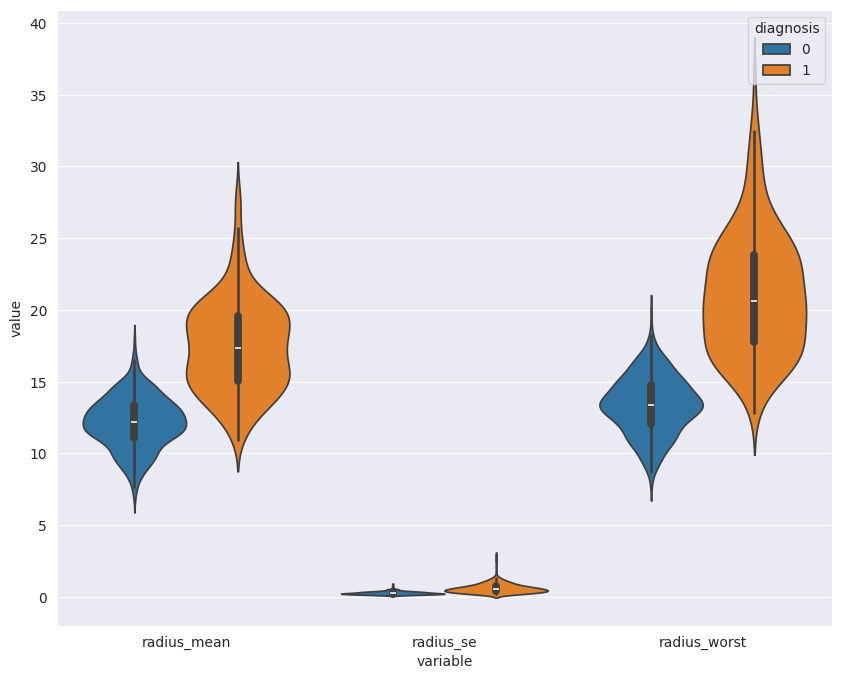

In [229]:
plt.figure(figsize=(10,8))
sns.violinplot(x= "variable" ,y = "value", hue= "diagnosis",
            data=pd.melt(df_cols_radius, id_vars='diagnosis'),
            scale="width")
plt.show()

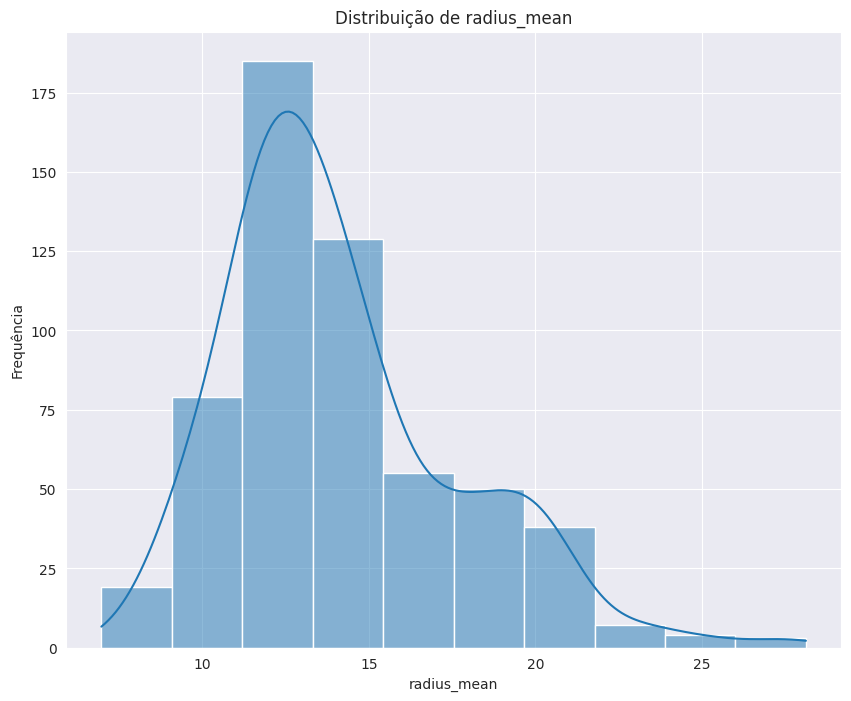

In [230]:
# Adiciona `kde=True` para a curva de densidade
sns.histplot(data=df, x='radius_mean', bins=10, kde=True)  # Adiciona `kde=True` para a curva de densidade
plt.title('Distribuição de radius_mean')
plt.xlabel('radius_mean')
plt.ylabel('Frequência')
plt.show()

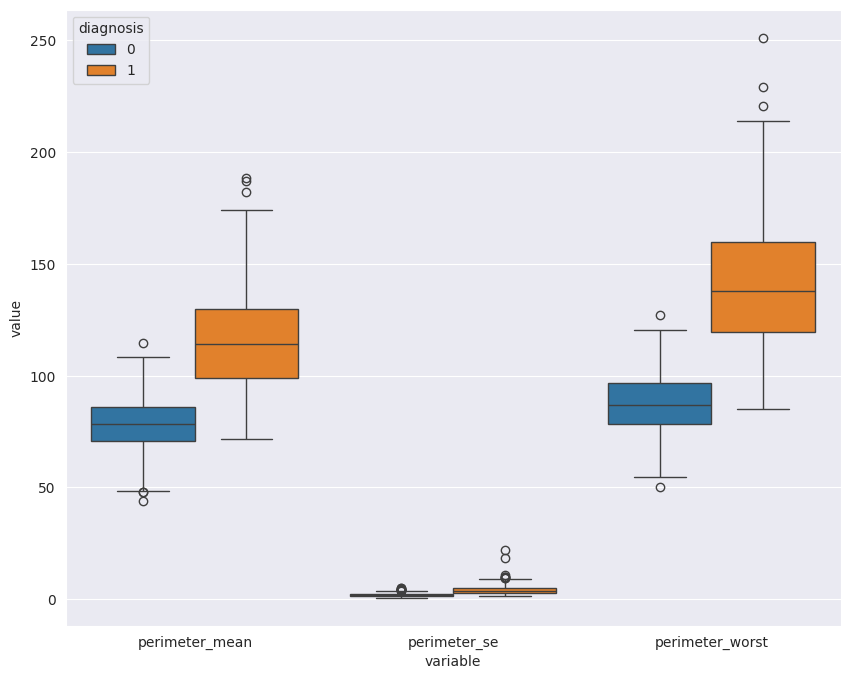

In [231]:
plt.figure(figsize=(10,8))
sns.boxplot(x= "variable" ,y = "value", hue= "diagnosis",
            data=pd.melt(df_cols_perimeter,
                         id_vars='diagnosis'))
plt.show()


<ipython-input-232-a33f9c06bfef>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x= "variable" ,y = "value", hue= "diagnosis",


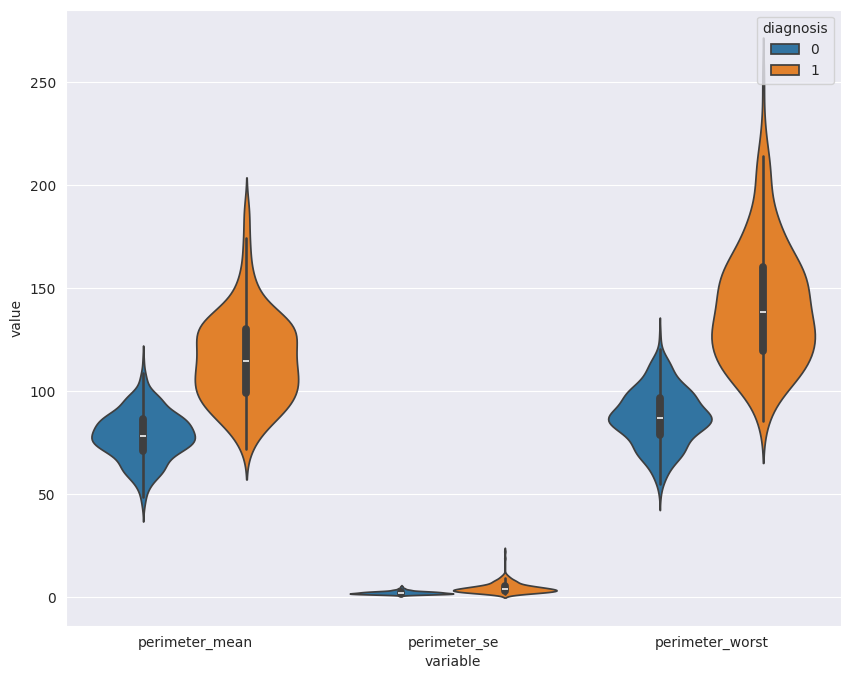

In [232]:
plt.figure(figsize=(10,8))
sns.violinplot(x= "variable" ,y = "value", hue= "diagnosis",
            data=pd.melt(df_cols_perimeter, id_vars='diagnosis'),
            scale="width")
plt.show()

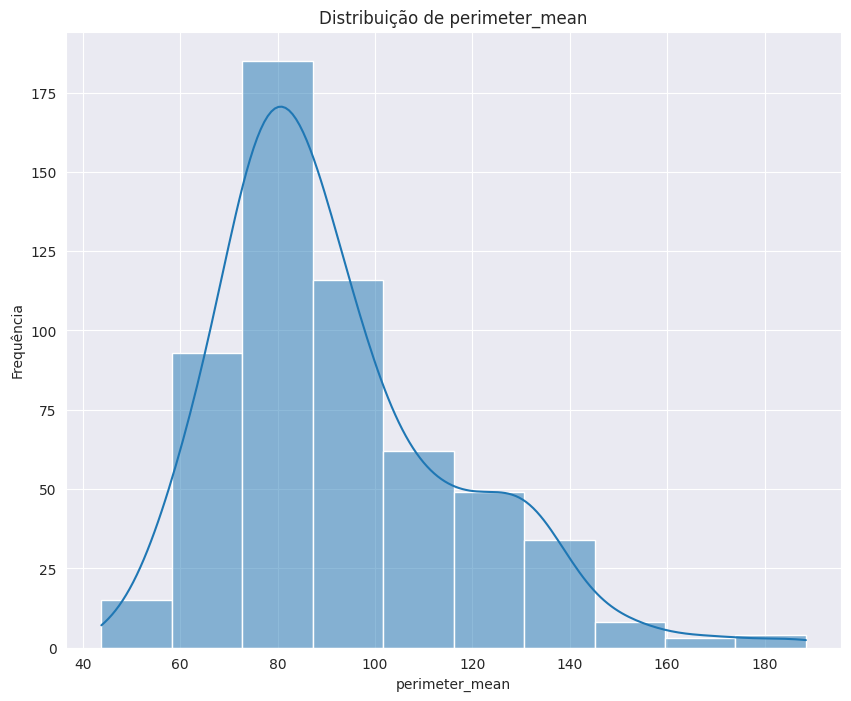

In [233]:
# Adiciona `kde=True` para a curva de densidade
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='perimeter_mean', bins=10, kde=True)  # Adiciona `kde=True` para a curva de densidade
plt.title('Distribuição de perimeter_mean')
plt.xlabel('perimeter_mean')
plt.ylabel('Frequência')
plt.show()


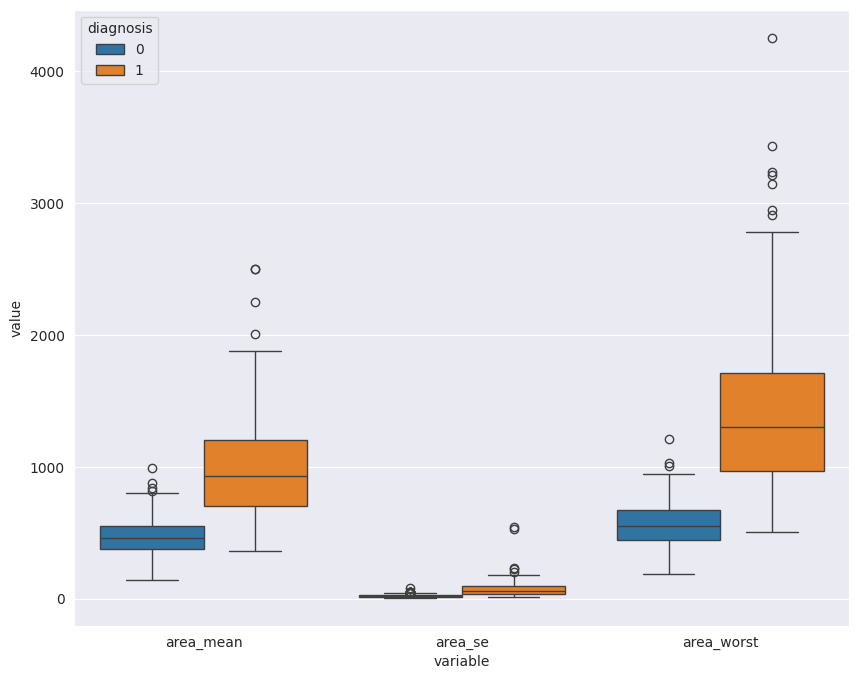

In [234]:
plt.figure(figsize=(10,8))
sns.boxplot(x= "variable" ,y = "value", hue= "diagnosis",
            data=pd.melt(df_cols_area,
                         id_vars='diagnosis'))
plt.show()

<ipython-input-235-a4aca7fa682e>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x= "variable" ,y = "value", hue= "diagnosis",


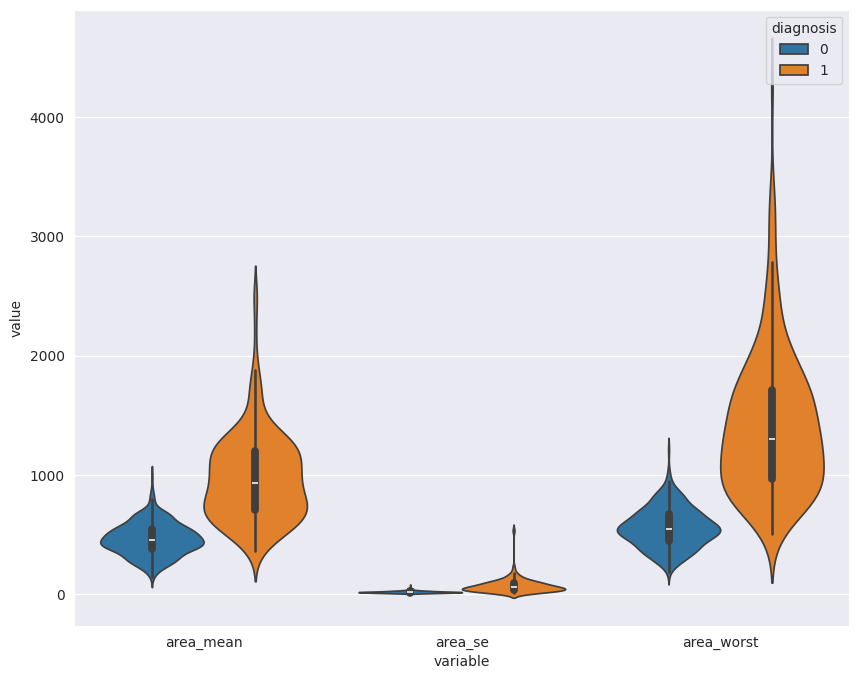

In [235]:
plt.figure(figsize=(10,8))
sns.violinplot(x= "variable" ,y = "value", hue= "diagnosis",
            data=pd.melt(df_cols_area, id_vars='diagnosis'),
            scale="width")
plt.show()

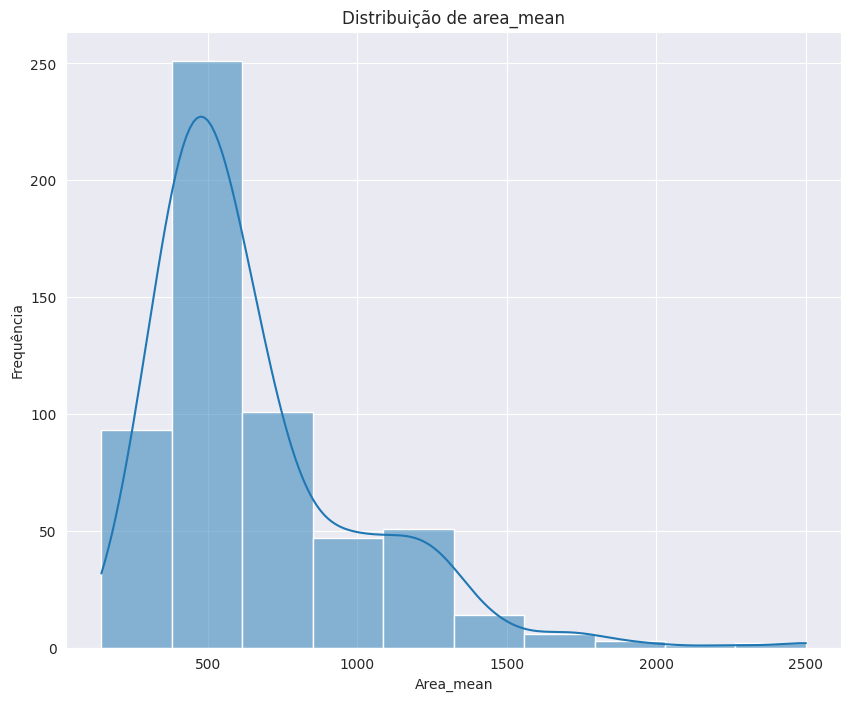

In [236]:
# Adiciona `kde=True` para a curva de densidade
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='area_mean', bins=10, kde=True)  # Adiciona `kde=True` para a curva de densidade
plt.title('Distribuição de area_mean')
plt.xlabel('Area_mean')
plt.ylabel('Frequência')
plt.show()

## Observações:

*   Ratifica-se o certo nível de separação nos valores do raio, perímetro e área nos pontos de dados benignos (diagnóstico = 0) e malignos (diagnóstico = 1) conforme observado no pairplot.
*  Cada uma das características parece ter valores discrepantes (outliers), conforme mostrado no boxplot, e portanto precisam ser tratadas durante o pré-processamento dos dados.
* A distribuição parece ser Gaussiana (Normal) com uma assimetria à direita (skewness positiva).

## Detecção de Outliers - Local Outlier Factor (LOF)
O Local Outlier Factor (LOF) é um algoritmo de detecção de anomalias que se destaca na análise de dados, especialmente em conjuntos de dados de alta dimensão.
Oo LOF é projetado para identificar outliers, ou seja, pontos de dados que se desviam significativamente do padrão geral do conjunto de dados. Ao contrário de métodos tradicionais que consideram a distância global entre os pontos, o LOF avalia a densidade local de cada ponto, permitindo uma identificação mais precisa de anomalias em contextos onde a distribuição dos dados pode variar.
https://scikit-learn.org/dev/auto_examples/neighbors/plot_lof_outlier_detection.html

In [130]:
# y = df['diagnosis']
# x = df.drop(['diagnosis'],axis=1)
# columns = x.columns.tolist()

In [131]:
#Importação e Instanciação do Local Outlier Factor:
#avalia o quão isolados os pontos estão em relação aos seus vizinhos.
clf = LocalOutlierFactor()

#Ajuste do Modelo e Predição de Outliers:
# ajusta o modelo aos dados x e retorna -1 para pontos considerados anomalias e 1 para pontos considerados normais.
out_predict = clf.fit_predict(x)

#Obtendo o Fator de Outlier Negativo
#retorna o fator de outlier negativo para cada ponto, onde valores mais negativos indicam maior probabilidade de serem anomalias.
X_score = clf.negative_outlier_factor_

#Criação do DataFrame para Armazenar os scores
#armazena os escores de outlier, facilitando a análise.
outlier_score = pd.DataFrame()
outlier_score["Score"] = X_score

#Visualizando os Primeiros 20 scores
outlier_score["Score"].head(20)

,Score
0,-2.183163
1,-2.154486
2,-1.268009
3,-1.260062
4,-1.258933
5,-2.001497
6,-1.931086
7,-1.247778
8,-1.866204
9,-1.242994


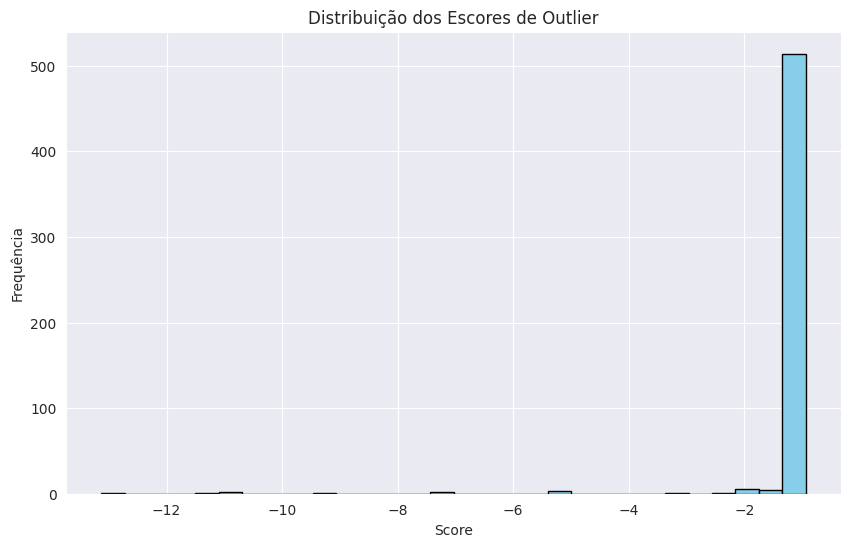

In [123]:
# # Adiciona a previsão de outlier (-1 para outlier, 1 para normal)
# outlier_score["Prediction"] = out_predict

# # Plotagem dos escores para visualização
# plt.figure(figsize=(10, 6))
# plt.hist(outlier_score["Score"], bins=30, color='skyblue', edgecolor='black')
# plt.title("Distribuição dos Escores de Outlier")
# plt.xlabel("Score")
# plt.ylabel("Frequência")
# plt.show()

In [124]:
# #Definição do Threshold
# #Define um limite de -2.5 para identificar outliers. Qualquer ponto com um score menor que -2.5 será considerado um outlier.
# threshold=-2.5

# #Criação de um Filtro para Detectar Outliers:
# #Cria uma série booleana filtre, que é True para os índices onde o valor do score é menor que -2.5, indicando possíveis outliers.
# filtre=outlier_score["Score"] < threshold

# #Obtenção dos Índices dos Outliers:
# #Filtra outlier_score usando filtre para selecionar apenas os índices que atendem à condição de outlier e os armazena em uma lista outlier_index
# outlier_index=outlier_score[filtre].index.tolist()

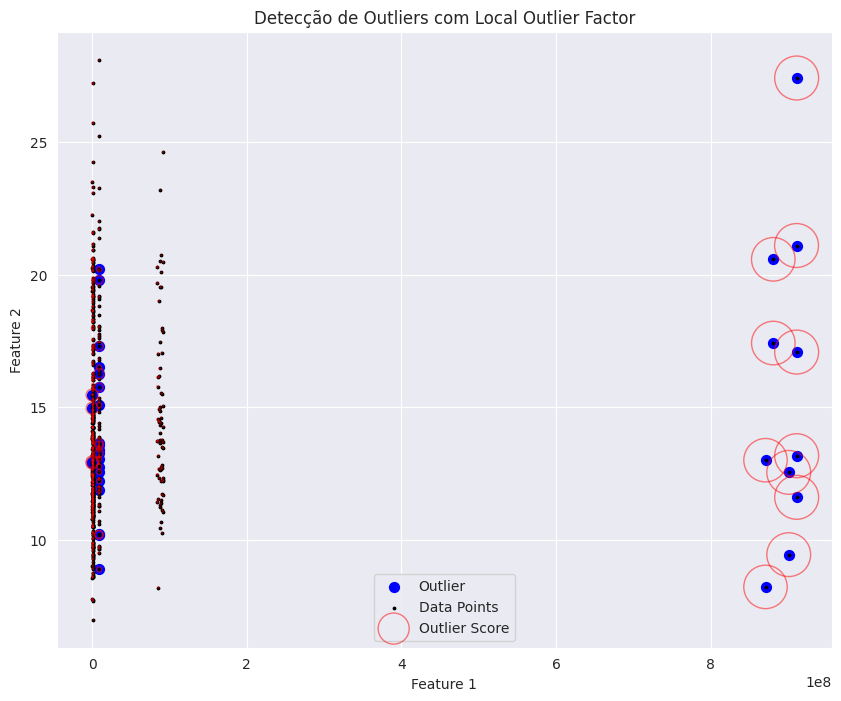

In [119]:
# # Define as cores e o tamanho dos pontos de outliers e dados normais
# plt.scatter(x.iloc[outlier_index, 0], x.iloc[outlier_index, 1], color="blue", s=50, label="Outlier")
# plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color="black", s=3, label="Data Points")

# # Calcula o raio dos pontos de outlier com base no score
# radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())
# outlier_score["radius"] = radius

# # Plota o Outlier Score, com os pontos grandes e transparentes para destaque
# plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s=1000 * radius, color="red", edgecolor="red",
#             label="Outlier Score", facecolors="none", alpha=0.5)

# # Ajuste da legenda e exibição do gráfico
# plt.xlabel("Feature 1")  # Substitua pelo nome da sua primeira feature
# plt.ylabel("Feature 2")  # Substitua pelo nome da sua segunda feature
# plt.legend()
# plt.title("Detecção de Outliers com Local Outlier Factor")
# plt.show()

In [132]:
# x=x.drop(outlier_index)
# y=y.drop(outlier_index).values

# Separação dos dados em Treino e Teste

In [237]:
y=df['diagnosis']
X=df.drop(columns=['diagnosis', 'id'] ,axis=1)

In [238]:
X.shape

(569, 30)

In [239]:
X.cols = X.columns.to_list()
len(X.cols)

<ipython-input-239-528df9ff92bf>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.cols = X.columns.to_list()


30

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50)

#Normalização Min_Max

In [241]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mms=MinMaxScaler()

X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

In [242]:
X_train_df = pd.DataFrame(X_train, columns=X.cols)
X_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,398.0,0.343485,0.172937,0.0,0.220739,0.300961,0.428156,1.0
texture_mean,398.0,0.310631,0.149219,0.0,0.200433,0.295502,0.397318,1.0
perimeter_mean,398.0,0.338070,0.174373,0.0,0.213738,0.293138,0.426785,1.0
area_mean,398.0,0.222289,0.157574,0.0,0.114443,0.173871,0.277858,1.0
smoothness_mean,398.0,0.335679,0.139026,0.0,0.236594,0.329170,0.425116,1.0
compactness_mean,398.0,0.260539,0.167242,0.0,0.134524,0.223453,0.338154,1.0
concavity_mean,398.0,0.212091,0.195860,0.0,0.067883,0.139738,0.310157,1.0
concave_points_mean,398.0,0.246591,0.201085,0.0,0.101417,0.165432,0.367942,1.0
symmetry_mean,398.0,0.402868,0.149926,0.0,0.300650,0.390845,0.479144,1.0
fractal_dimension_mean,398.0,0.267168,0.153104,0.0,0.155381,0.237363,0.337300,1.0


# 2. Aplicação do K-Means:
## 2.1) Utilizar o algoritmo K-Means para agrupar os tumores com base nas características celulares.
## 2.2) Avaliar diferentes números de clusters (valores de K) e interpretar os resultados.

# k=2

In [243]:
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10,random_state=0, tol=0.0001, verbose=0)
kmeans.cluster_centers_

array([[1.25562991e+01, 1.85703653e+01, 8.11234703e+01, 4.96061872e+02,
        9.48844977e-02, 9.10998174e-02, 6.24377642e-02, 3.34325434e-02,
        1.78057991e-01, 6.34540183e-02, 3.04190868e-01, 1.21515320e+00,
        2.15288059e+00, 2.37852922e+01, 7.17326256e-03, 2.34746895e-02,
        2.87455128e-02, 1.06363242e-02, 2.06135799e-02, 3.74750297e-03,
        1.40439018e+01, 2.47095434e+01, 9.19375114e+01, 6.19647945e+02,
        1.29959110e-01, 2.23311758e-01, 2.19214947e-01, 9.13298425e-02,
        2.83553653e-01, 8.32819406e-02],
       [1.93799237e+01, 2.16945802e+01, 1.28231298e+02, 1.18592977e+03,
        1.01294580e-01, 1.48612977e-01, 1.76939466e-01, 1.00698779e-01,
        1.91539695e-01, 6.06029008e-02, 7.42803817e-01, 1.22253817e+00,
        5.25058015e+00, 9.56781679e+01, 6.59868702e-03, 3.21766947e-02,
        4.24197710e-02, 1.56739847e-02, 2.03039695e-02, 3.95338931e-03,
        2.37094656e+01, 2.89126718e+01, 1.58496183e+02, 1.75302290e+03,
        1.40424733e-01,

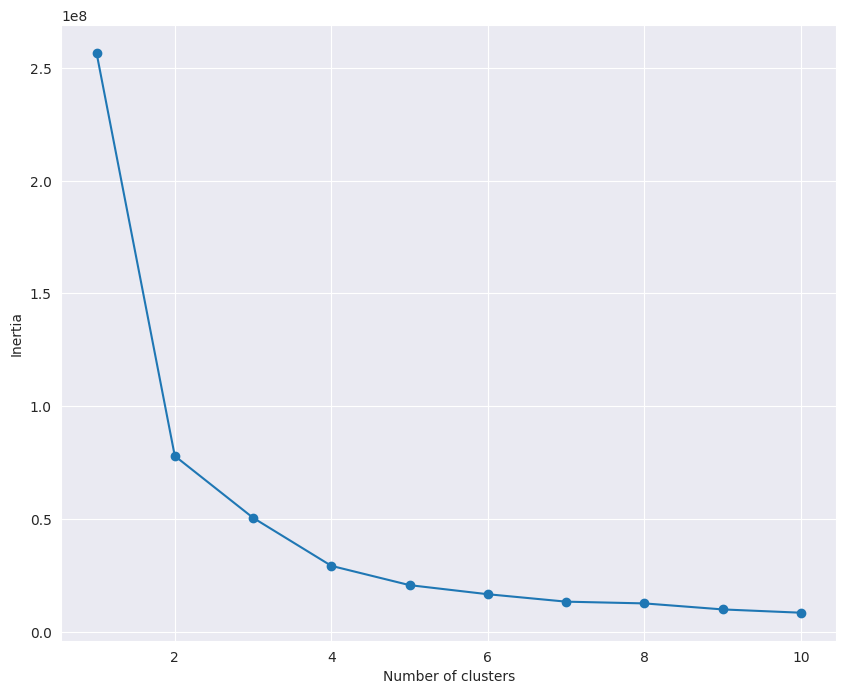

In [244]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

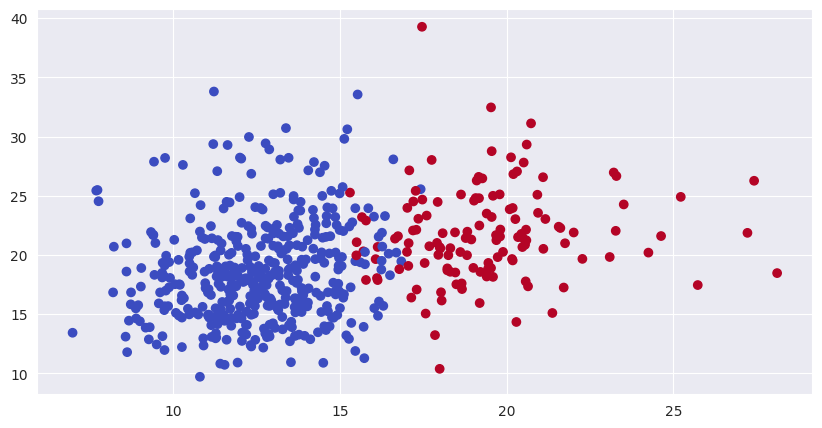

In [245]:
# cluster size is set to be 3
km = KMeans(n_clusters = 2)
km.fit(X)

#loting the graph of the clusters
plt.figure(figsize=(10,5))
plt.scatter(x= X.iloc[:, 0],
            y=X.iloc[:, 1],
            cmap='coolwarm',
            c= km.labels_)

# 3. Análise dos clusters:
## 3.1) Identificar padrões comuns nos clusters, como características celulares típicas de tumores malignos ou benignos.
## 3.2) Explorar a relação entre os clusters e a variável de saída (benigno/maligno) para validar os agrupamentos.

# 4. Visualização dos resultados:
## 4.1) Utilizar técnicas como PCA (Análise de Componentes Principais) para reduzir a dimensionalidade e visualizar os clusters em gráficos.
## 4.2) Visualização dos resultados:
Utilizar técnicas como PCA (Análise de Componentes Principais) para reduzir a dimensionalidade e visualizar os clusters em gráficos.

In [246]:
x_scaled=scaler.fit_transform(x)
pca=PCA(n_components=2)
X_reduced_pca=pca.fit_transform(x_scaled)
pca_data=pd.DataFrame(columns=["p1","p2"],data=X_reduced_pca)
pca_data["target"]=y

Text(0.5, 1.0, 'PCA - Dataset Breast Cancer')

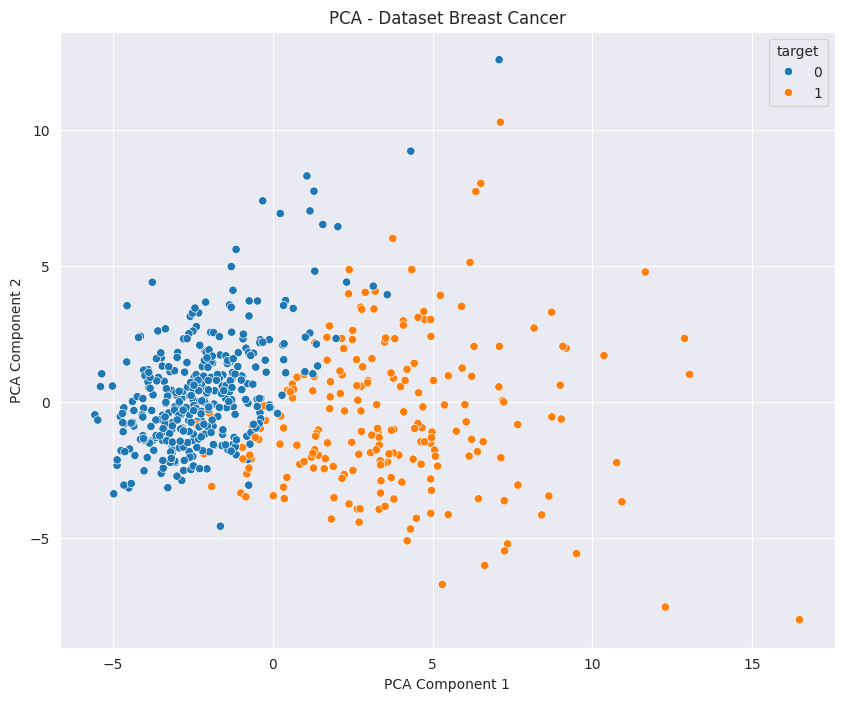

In [247]:
sns.scatterplot(x="p1",y="p2",hue="target",data=pca_data)
# plt.title("PCA:p1 and p2")
# plt.show()

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA - Dataset Breast Cancer')

# Conclusões:
## Discutir como os agrupamentos podem ajudar na estratificação dos pacientes e no entendimento dos fatores celulares que influenciam o risco de malignidade.